<a href="https://colab.research.google.com/github/jordantangy/Final-Project/blob/main/plots_and_posters_intermediates_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import csv

data = pd.read_csv('drive/MyDrive/Final Project/movie_plots_by_poster.csv')
truncat = data[:5]
truncat.values[0][4]

7.4

In [4]:
import tensorflow_hub as hub
import tensorflow as tf
import torch

plot_model = "https://tfhub.dev/google/universal-sentence-encoder/4"
hub_layer = hub.KerasLayer(plot_model, input_shape=[], dtype=tf.string, trainable=True)

In [5]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is NOT AVAILABLE


In [6]:
x_plots = truncat.drop(['id','poster','title','year','rating','genre','action','adventure','animation','comedy','crime','drama','fantasy','horror','mystery','romance','sci-fi','short','thriller'], axis = 1)
x_plots = x_plots.to_numpy()

In [7]:
plot_model = tf.keras.Sequential()
plot_model.add(hub_layer)
plot_model.add(tf.keras.layers.Dense(16, activation='relu'))
plot_model.add(tf.keras.layers.Dense(13))

plot_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dense (Dense)                (None, 16)                8208      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                221       
Total params: 256,806,253
Trainable params: 256,806,253
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

layer_name = 'keras_layer'
intermediate_layer_model = keras.Model(inputs=plot_model.input,
                                       outputs=plot_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_plots)
print(intermediate_output)

tf.Tensor(
[[ 0.03207485 -0.05942298  0.01657976 ... -0.03323282  0.04054418
   0.04799057]
 [-0.07227465  0.07675827  0.01973101 ...  0.00130296  0.0689291
   0.02174744]
 [-0.01638548  0.01023046  0.01114467 ...  0.03901434 -0.0183612
   0.05421558]
 [-0.04394719  0.04652793  0.00542503 ... -0.0432737   0.09255808
   0.0013464 ]
 [ 0.04149799 -0.06425259 -0.03056165 ... -0.02624768  0.06745882
  -0.07507793]], shape=(5, 512), dtype=float32)


In [9]:
for idx in range(len(plot_model.layers)):
  print(plot_model.get_layer(index = idx).name)

keras_layer
dense
dense_1


In [10]:
plot_array = intermediate_output.numpy()
#print(poster_array[0])

In [11]:
#!pip install tensorflow==2.0.0-rc0

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [13]:
data = pd.read_csv('/content/drive/MyDrive/Final Project/duplicate_free_41K.csv')
truncat = data[:30000]
truncat

,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30023,https://m.media-amazon.com/images/M/MV5BMTU1Nj...,A Mother's Nightmare,2012,6.0,"crime, mystery, thriller",0,0,0,0,1,0,0,0,1,0,0,0,1
29996,30024,https://m.media-amazon.com/images/M/MV5BMTQ3Mz...,SheZow,2012,6.0,"animation, action, adventure",1,1,1,0,0,0,0,0,0,0,0,0,0
29997,30025,https://m.media-amazon.com/images/M/MV5BNDNkN2...,The Seven Year Hitch,2012,6.0,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
29998,30026,https://m.media-amazon.com/images/M/MV5BNjg5ZD...,Onii-chan Dakedo Ai Sae Areba Kankei Nai yo ne-,2012,6.0,animation,0,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
pic_width = 224
pic_height = 224
x_posters = []
#X_test = []
for i in tqdm(range(10,15)):
  path = '/content/drive/MyDrive/Final Project/img_41K/'+ str(data['id'][i]) +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  x_posters.append(img)

100%|██████████| 5/5 [00:00<00:00, 155.90it/s]


In [15]:
x_posters = np.array(x_posters)

'horror'

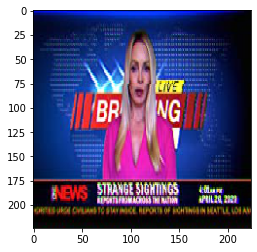

In [16]:
plt.imshow(x_posters[1])
data['genre'][1]

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')
poster_model = Sequential()
poster_model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_posters[0].shape))
poster_model.add(BatchNormalization())
poster_model.add(MaxPool2D(2,2))
poster_model.add(Dropout(0.1))

poster_model.add(Conv2D(32, (3,3), activation='relu'))
poster_model.add(BatchNormalization())
poster_model.add(MaxPool2D(2,2))


poster_model.add(Conv2D(64, (3,3), activation='relu'))
poster_model.add(BatchNormalization())
poster_model.add(MaxPool2D(2,2))
poster_model.add(Dropout(0.2))

poster_model.add(Conv2D(128, (3,3), activation='relu'))
poster_model.add(BatchNormalization())
poster_model.add(MaxPool2D(2,2))


poster_model.add(Flatten())

poster_model.add(Dense(128, activation='relu'))
poster_model.add(BatchNormalization())


poster_model.add(Dense(128, activation='relu'))
poster_model.add(BatchNormalization())

poster_model.add(Dense(512, activation='relu'))

poster_model.add(Dense(13, activation='sigmoid'))

In [18]:
for idx in range(len(poster_model.layers)):
  print(poster_model.get_layer(index = idx).name)

conv2d
batch_normalization
max_pooling2d
dropout
conv2d_1
batch_normalization_1
max_pooling2d_1
conv2d_2
batch_normalization_2
max_pooling2d_2
dropout_1
conv2d_3
batch_normalization_3
max_pooling2d_3
flatten
dense_2
batch_normalization_4
dense_3
batch_normalization_5
dense_4
dense_5


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

layer_name = 'dense_4'
intermediate_layer_model = keras.Model(inputs=poster_model.input,
                                       outputs=poster_model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model(x_posters)
print(intermediate_output)

tf.Tensor(
[[6.2702834e-03 1.9381497e-02 5.8781105e-04 ... 2.5501503e-03
  0.0000000e+00 3.4513087e-03]
 [4.8701957e-04 4.1939382e-02 0.0000000e+00 ... 3.1834531e-03
  0.0000000e+00 1.6026037e-02]
 [3.4108488e-03 4.1003712e-02 0.0000000e+00 ... 1.3501125e-02
  0.0000000e+00 2.0005519e-02]
 [5.6837736e-05 1.9507889e-02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 8.1501249e-03]
 [0.0000000e+00 3.6436226e-02 0.0000000e+00 ... 4.2089615e-03
  0.0000000e+00 2.9953856e-03]], shape=(5, 512), dtype=float32)


In [20]:
poster_array = intermediate_output.numpy()
#print(poster_array[0])

Array to csv Portion


In [21]:
from google.colab import files
import csv

with open('intermediates_1.csv','w',newline='') as f:
    fieldnames = ['plot', 'poster','action', 'adventure', 'animation', 'comedy', 'crime', 'drama', 'fantasy', 'horror',
                  'mystery', 'romance', 'sci-fi', 'short', 'thriller']
    thewriter = csv.DictWriter(f,fieldnames=fieldnames)
    thewriter.writeheader()
    for i in range(0,5):
      thewriter.writerow({'plot' : plot_array[i], 'poster' : poster_array[i],'action' : truncat.values[i][6],
                'adventure' : truncat.values[i][7], 'animation' : truncat.values[i][8], 'comedy' : truncat.values[i][9],
                'crime' : truncat.values[i][10], 'drama' : truncat.values[i][11], 'fantasy' : truncat.values[i][12],  'horror' : truncat.values[i][13],
                'mystery' : truncat.values[i][14], 'romance' : truncat.values[i][15], 'sci-fi' : truncat.values[i][16], 'short' : truncat.values[i][17], 
                'thriller' : truncat.values[i][18]}) 
files.download("intermediates_1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
from keras.layers import concatenate

combined = concatenate([plot_array, poster_array])